In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
data=pd.read_csv("crx.data", header=None)
#data.info()
#data.head(5)

In [45]:
# x: data without classes
x = data.loc[:, 0:data.shape[1] - 2]
x = x.replace('?', np.nan)
x[1] = x[1].astype(float)
# y: classes

In [46]:
y = data[data.shape[1] - 1]

In [47]:
# c: number of classes
c = len(np.unique(y))

In [48]:
n, p = x.shape

In [49]:
x.describe()

,1,2,7,10,14
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [50]:
idxCat = [0,3,4,5,6,8,9,11,12,13] #les index de la categories
x[idxCat].mode()

,0,3,4,5,6,8,9,11,12,13
0,b,u,g,c,v,t,f,f,g,00000


In [51]:
for i in idxCat: #"lister toutes les valeurs contenues dans chaque 
    print(x[i].unique())

['b' 'a' nan]
['u' 'y' nan 'l']
['g' 'p' nan 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
['t' 'f']
['t' 'f']
['f' 't']
['g' 's' 'p']
['00202' '00043' '00280' '00100' '00120' '00360' '00164' '00080' '00180'
 '00052' '00128' '00260' '00000' '00320' '00396' '00096' '00200' '00300'
 '00145' '00500' '00168' '00434' '00583' '00030' '00240' '00070' '00455'
 '00311' '00216' '00491' '00400' '00239' '00160' '00711' '00250' '00520'
 '00515' '00420' nan '00980' '00443' '00140' '00094' '00368' '00288'
 '00928' '00188' '00112' '00171' '00268' '00167' '00075' '00152' '00176'
 '00329' '00212' '00410' '00274' '00375' '00408' '00350' '00204' '00040'
 '00181' '00399' '00440' '00093' '00060' '00395' '00393' '00021' '00029'
 '00102' '00431' '00370' '00024' '00020' '00129' '00510' '00195' '00144'
 '00380' '00049' '00050' '00381' '00150' '00117' '00056' '00211' '00230'
 '00156' '00022' '00228' '00519' '00253' '00487' '00220' '00088' '000

In [52]:
#pour chaque colonnes, le pourcentage des valeurs manquantes
x.isnull().sum()/100*n

0     82.8
1     82.8
2      0.0
3     41.4
4     41.4
5     62.1
6     62.1
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13    89.7
14     0.0
dtype: float64

In [53]:
#ajout de titres et index numériques
x.columns = [
  'gender', 
  'age', 
  'debt', 
  'married', 
  'bankCustomer', 
  'educationLevel',
  'ethnicity', 
  'yearsEmployed', 
  'priorDefault', 
  'employed', 
  'creditScore', 
  'driversLicense', 
  'citizen',
  'zipCode', 
  'income'
]

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
gender            678 non-null object
age               678 non-null float64
debt              690 non-null float64
married           684 non-null object
bankCustomer      684 non-null object
educationLevel    681 non-null object
ethnicity         681 non-null object
yearsEmployed     690 non-null float64
priorDefault      690 non-null object
employed          690 non-null object
creditScore       690 non-null int64
driversLicense    690 non-null object
citizen           690 non-null object
zipCode           677 non-null object
income            690 non-null int64
dtypes: float64(3), int64(2), object(10)
memory usage: 80.9+ KB


In [55]:
#Nettoyage et remplacement de valeurs
x = x.replace('t', 1)
x = x.replace('f', 0)
x = x.replace('a', 'm')
x = x.replace('b', 'f')

In [56]:
#convertir les valeurs en booléens avec astype(bool)
x[['priorDefault', 'employed', 'driversLicense']] = x[['priorDefault', 'employed', 'driversLicense']].astype(bool)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
gender            678 non-null object
age               678 non-null float64
debt              690 non-null float64
married           684 non-null object
bankCustomer      684 non-null object
educationLevel    681 non-null object
ethnicity         681 non-null object
yearsEmployed     690 non-null float64
priorDefault      690 non-null bool
employed          690 non-null bool
creditScore       690 non-null int64
driversLicense    690 non-null bool
citizen           690 non-null object
zipCode           677 non-null object
income            690 non-null int64
dtypes: bool(3), float64(3), int64(2), object(7)
memory usage: 66.8+ KB


In [57]:
x

,gender,age,debt,married,bankCustomer,educationLevel,ethnicity,yearsEmployed,priorDefault,employed,creditScore,driversLicense,citizen,zipCode,income
0,f,30.83,0.000,u,g,w,v,1.250,True,True,1,False,g,00202,0
1,m,58.67,4.460,u,g,q,h,3.040,True,True,6,False,g,00043,560
2,m,24.50,0.500,u,g,q,h,1.500,True,False,0,False,g,00280,824
3,f,27.83,1.540,u,g,w,v,3.750,True,True,5,True,g,00100,3
4,f,20.17,5.625,u,g,w,v,1.710,True,False,0,False,s,00120,0
5,f,32.08,4.000,u,g,m,v,2.500,True,False,0,True,g,00360,0
6,f,33.17,1.040,u,g,r,h,6.500,True,False,0,True,g,00164,31285
7,m,22.92,11.585,u,g,cc,v,0.040,True,False,0,False,g,00080,1349
8,f,54.42,0.500,y,p,k,h,3.960,True,False,0,False,g,00180,314
9,f,42.50,4.915,y,p,w,v,3.165,True,False,0,True,g,00052,1442


In [58]:
x['zipCode'] = x['zipCode'].replace('00000', np.nan) #enlever les zipCode contenant des Zéro

In [59]:
x.isnull().sum()

gender             12
age                12
debt                0
married             6
bankCustomer        6
educationLevel      9
ethnicity           9
yearsEmployed       0
priorDefault        0
employed            0
creditScore         0
driversLicense      0
citizen             0
zipCode           145
income              0
dtype: int64

In [60]:
x = x.drop('zipCode', 1) #supprimer les zipCode

In [61]:
modeValues = x.mode() #récupérer la valeur la plus représentée pour chaque colonnes
medianValues = x.median() 

# Categorucal data
x['gender'].fillna(value = modeValues['gender'][0], inplace = True)
x['married'].fillna(value = modeValues['married'][0], inplace = True)
x['bankCustomer'].fillna(value = modeValues['bankCustomer'][0], inplace = True)
x['educationLevel'].fillna(value = modeValues['educationLevel'][0], inplace = True)
x['ethnicity'].fillna(value = modeValues['ethnicity'][0], inplace = True)

# Numerical data
x['age'].fillna(value = medianValues['age'], inplace = True)

In [62]:
x.isnull().sum()

gender            0
age               0
debt              0
married           0
bankCustomer      0
educationLevel    0
ethnicity         0
yearsEmployed     0
priorDefault      0
employed          0
creditScore       0
driversLicense    0
citizen           0
income            0
dtype: int64

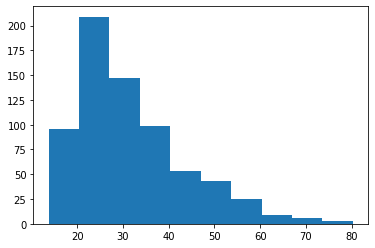

In [63]:
_ = plt.hist(x['age'], bins = 10) #histogramme des âges

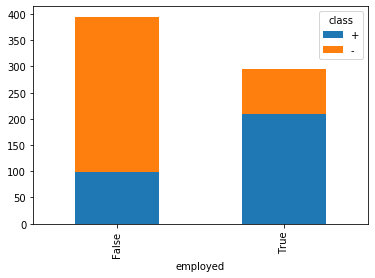

In [82]:
#5 plot cumulative histogram
xcel=pd.concat([x['employed'], y],axis=1)
xcel.columns=['employed', 'class']

df1=xcel.groupby(['employed', 'class'])['employed'].count().unstack()
#df1.describe() pour les infos
df1.plot(kind='bar',stacked=True, label='employed')

KeyError: "['Employed'] not in index"

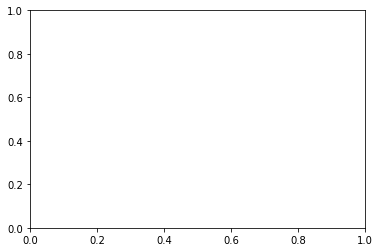

In [87]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(xcel,['Employed','class'])
plt.show(block=False)